In [2]:
from google.colab import files
uploaded = files.upload()

Saving digits.png to digits.png
Saving test_3.png to test_3.png


In [0]:
import numpy as np
import cv2 

In [7]:
img = cv2.imread('digits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이미지 분할
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape) # (50, 100, 20, 20)

# 트레인 셋 만들기 (이미지 매트릭스를 벡터로 변환)
train = x[:, :].reshape(-1, 400).astype(np.float32)
print(train.shape) # (5000, 400)

# 트레인 셋 레이블 만들기
k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]
print(train_labels.shape)

# 트레인 셋, 레이블 저장
np.savez('trained.npz', train=train, train_labels=train_labels)

(50, 100, 20, 20)
(5000, 400)
(5000, 1)


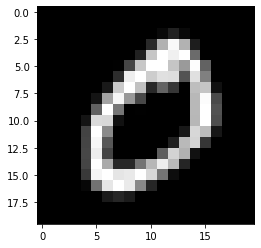

In [16]:
import matplotlib.pyplot as plt

# 저장된 트레인셋 이미지 출력하기
plt.imshow(cv2.cvtColor(x[0, 0], cv2.COLOR_GRAY2RGB))
plt.show()

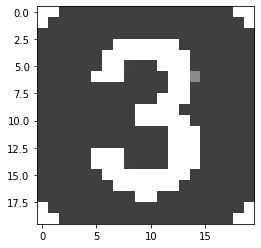

[[3.]]


In [17]:
import glob

FILE_NAME = 'trained.npz'

# 파일로부터 학습 데이터 불러오기
def load_train_data(file_name):
  with np.load(file_name) as data:
    train = data['train']
    train_labels = data['train_labels']
  return train, train_labels

# 임의의 손 글씨 이미지 (20X20) 크기로 Scaling 
def resize20(image):
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_resize = cv2.resize(gray, (20, 20))
  plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
  plt.show()
  return gray_resize.reshape(-1, 400).astype(np.float32)

# KNN 알고리즘 적용
def check(test, train, train_labels):
  knn = cv2.ml.KNearest_create()
  knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
  ret, result, neighbours, dist = knn.findNearest(test, k=5)
  return result

train, train_labels = load_train_data(FILE_NAME)

for file_name in glob.glob('./test_*.png'):
  test = resize20(file_name)
  result = check(test, train, train_labels)
  print(result)